<a href="https://colab.research.google.com/github/mpbast0s/2025-2---PPGEE---INTRODU-O-AO-APRENDIZADO-DE-M-QUINA-/blob/main/codigo_aula4_funcao_custo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compreendendo a função custo



## Objetivo

- Implementar e explorar a função `custo` utilizada na regressão linear com uma variável.


## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras a partir de dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definição do Problema

Você gostaria de estimar a tensão sobre um resistor com base no seu valor de corrente.

Usaremos as mesmas amostras de dados que já utilizamos no código anterior:

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |


In [2]:
x_trein = np.array([ 0.2,2.,5.,10.])       # característica
y_trein = np.array([ 10.64975337,106.49753367,266.24383418,532.48766835])    # valor alvo

## Calculando o Custo

O custo mede o quão bem o nosso modelo está estimando a tensão sobre o resistor.

A equação para o custo com uma variável é:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

onde
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ é a nossa previsão para a amostra $i$ usando os parâmetros $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ é o erro quadrático entre o valor alvo (medido) e a previsão (estimativa) feita pelo modelo.   
- Esses erros são somados para todas as $m$ amostras e divididas por `2m` para produzir o custo $J(w,b)$.  
>OBS: Nos slides da disciplina, o somatório vai tipicamente de 1 até m. Por outro lado, no código ele vai de 0 até m-1, já que em Python tem-se como zero a referência de indexação para vetores e matrizes


O código abaixo calcula o custo fazendo um loop que passa por cada uma das amostras. Para cada iteração do loop:
- a saída do modelo `f_wb` é calculada (previsão)
- a diferença (erro) entre a saída alvo e a previsão é calculada e elevada ao quadrado.
- essa quantidade é adicionada ao custo total.

In [3]:
def calcula_custo(x, y, w, b):
    """
    Calcula a função custo no âmbito da regressão linear.
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      y (ndarray (m,)): Valores alvo de saída
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      custo_total (float): O custo de se usar w,b como parâmetros na regressão linear
               para ajustar os dados
    """
    # número de amostras de treinamento
    m = x.shape[0]

    soma_custo = 0
    for i in range(m):
        f_wb = w * x[i] + b
        custo = (f_wb - y[i]) ** 2
        soma_custo = soma_custo + custo
    custo_total = (1 / (2 * m)) * soma_custo

    return custo_total

## Função custo: uma visão intuitiva

O seu objetivo agora é encontrar um modelo $f_{w,b}(x) = wx + b$, com parâmetros $w,b$, que seja capaz de estimar com precisão a tensão sobre um resistor para uma dada corrente de entrada $x$. O custo é a medida do quão bem o modelo performa para os dados de treinamento em questão.

A função custo (1) acima mostra que, se $w$ e $b$ podem ser selecionados tal que as previsões $f_{w,b}(x)$ são iguais aos dados em $y$, então o termo $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ será zero e o custo é minimizado totalmente. Neste exemplo simples que possui apenas dois pontos, você pode conseguir exatamente isso.

No código anterior, você já encontrou valores para $w,b$ que resultam num modelo preciso. Insira esses valores no código abaixo e verifique o custo associado. Se necessário, refine os valores escolhidos para $w,b$ até que um custo $J(w,b)$ próximo de zero seja obtido.

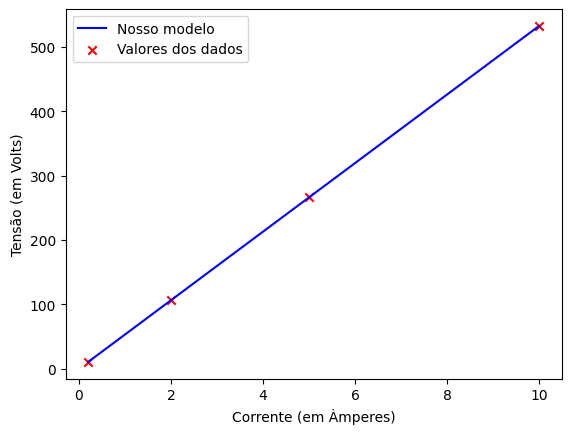

Custo J para esse conjunto de parâmetros w,b: 2.4528817252447624e-05


In [18]:
w = 53.25
b = 0

# Calculando a tensão estimada para o modelo para as correntes em x_trein
m    = x_trein.shape[0]
f_wb = np.zeros(m)
for i in range(m):
    f_wb[i] = w * x_trein[i] + b

J = calcula_custo(x_trein, y_trein, w, b)

# Plotando a previsão feita pelo modelo
plt.plot(x_trein, f_wb, c='b',label='Nosso modelo')

# Plotando os dados medidos
plt.scatter(x_trein, y_trein, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()

print(f"Custo J para esse conjunto de parâmetros w,b: {J}")

Note no código abaixo que, fixando o valor de $b$ em $b=0$, podemos verificar como é o gráfico da função custo $J$ em função do parâmetro $w$.

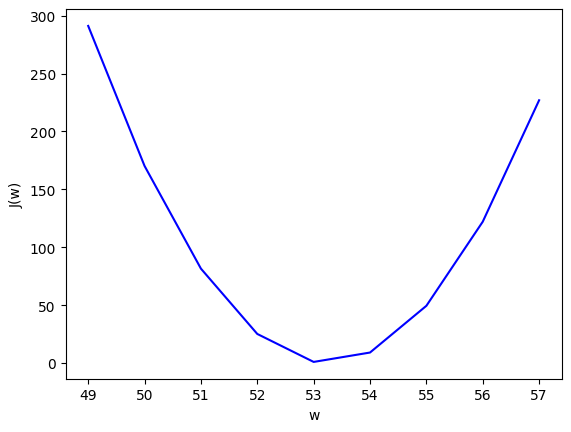

In [9]:
b = 0

valores_para_w = np.array([ 49, 50, 51, 52, 53, 54, 55, 56, 57])

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_trein, y_trein, w, b)

# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

Alguns pontos podem ser destacados
- O custo é minimizado para $b$ próximo de 0 e para $w$ próximo de 53. Tais resultados estão de acordo com os resultados vistos no último código.
- Uma vez que o erro entre o valor medido e a previsão é elevado ao quadrado na função custo, o custo rapidamente cresce quando $w$ se distancia do seu valor ideal.
- Se `w` e `b` forem selecionados de forma que $J=0$, isso significa que o modelo se ajusta perfeitamente aos dados.

# Parabéns!
Você aprendeu o seguinte nesse código:
 - A função custo nos fornece uma medida de quão boas são as estimativas feitas pelo nosso modelo
 - Minimizar a função custo pode nos levar a valores ótimos para $w$, $b$.